# 18MA20015 | Harshal Dupare

### Assignment 2
The goal of this assignment is to understand the effectiveness of condensed KNN for classification over
the standard KNN. You need to use the dataset given in the link below for your experiments.

First, split the dataset into two groups: 80% (train) and 20% (test). Implement KNN and measure its
accuracy for the test set. The accuracy is simply the percentage of correct classification for the test
samples.

Implement condensed KNN on the same training set (80% data) to find the reduced set. Compute the
accuracy of KNN for the test set using the condensed set as the training data.
You need to submit your code and a text file containing the accuracy of each KNN and the percentage
of training data reduction in condensed KNN.
Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('wine.data',header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
# taking the target variable out of data
X,y=df.iloc[:,1:],df.iloc[:,0]

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## KNN model

In [5]:
acc = []
nbr = []
for n in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=n) 
    knn.fit(X_train, y_train) 
    perc = (knn.score(X_test, y_test)*100).__round__(2)
    acc.append(perc)
    nbr.append(n)
    print(f"The accuracy of the model with {n} neighbours is "+str(perc)+"%")

The accuracy of the model with 2 neighbours is 72.22%
The accuracy of the model with 3 neighbours is 80.56%
The accuracy of the model with 4 neighbours is 75.0%
The accuracy of the model with 5 neighbours is 72.22%
The accuracy of the model with 6 neighbours is 72.22%
The accuracy of the model with 7 neighbours is 69.44%
The accuracy of the model with 8 neighbours is 72.22%
The accuracy of the model with 9 neighbours is 72.22%


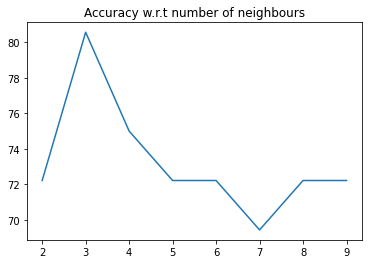

In [6]:
plt.plot(nbr,acc)
plt.title("Accuracy w.r.t number of neighbours")
plt.show()

## Condensed KNN

In [7]:
class cknn(object):
    def __init__(self,_n):
        self.n = _n
        self._KNN = KNeighborsClassifier(n_neighbors=self.n)
        pass
    
    def _find(self,done):
        for k in done.keys():
            if not done[k]:
                return k
        return -1
    
    def fit(self,X_train,y_train):
        idx = list(X_train.index)
        done = {i:False for i in idx}
        ndone = len(done)-1
        S=list(X_train.index[0:self.n])
        SX_train = X_train.iloc[0:self.n]
        Sy_train = y_train.iloc[0:self.n]
        for sid in S:
            done[sid]=True
        
        while True :
            k = self._find(done)
            if k==-1:
                break
            knn = KNeighborsClassifier(n_neighbors=self.n)
            knn.fit(SX_train, Sy_train) 
            pred = knn.predict(X_train)
            for i in range(len(y_train)):
                if pred[i] != y_train.iloc[i] and not done[X_train.index[i]]:
                    SX_train = SX_train.append(X_train.iloc[i:i+1])
                    Sy_train = Sy_train.append(y_train.iloc[i:i+1])
                    S.append(X_train.index[i])
                    done[X_train.index[i]]=True
                    break
                else:
                    done[X_train.index[i]]=True
            self._KNN = knn
                    
        return S

In [8]:
acc = []
nbr = []
for n in range(2,10):
    knn = cknn(n) 
    S = knn.fit(X_train, y_train) 
    perc = (knn._KNN.score(X_test, y_test)*100).__round__(2)
    trd = (len(S)/len(y_train)*100).__round__(2)
    acc.append(perc)
    nbr.append(n)
    print(f"The accuracy of the model with {n} neighbours is "+str(perc)+"%, and the percentage of training data reduction is "+str(trd)+"%")

The accuracy of the model with 2 neighbours is 77.78%, and the percentage of training data reduction is 38.03%
The accuracy of the model with 3 neighbours is 77.78%, and the percentage of training data reduction is 35.21%
The accuracy of the model with 4 neighbours is 69.44%, and the percentage of training data reduction is 35.21%
The accuracy of the model with 5 neighbours is 72.22%, and the percentage of training data reduction is 40.14%
The accuracy of the model with 6 neighbours is 66.67%, and the percentage of training data reduction is 35.92%
The accuracy of the model with 7 neighbours is 63.89%, and the percentage of training data reduction is 36.62%
The accuracy of the model with 8 neighbours is 66.67%, and the percentage of training data reduction is 38.03%
The accuracy of the model with 9 neighbours is 66.67%, and the percentage of training data reduction is 42.96%


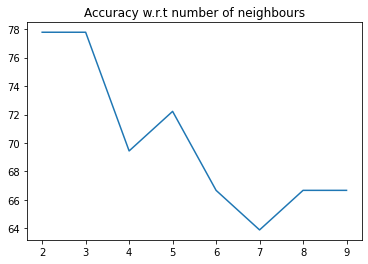

In [9]:
plt.plot(nbr,acc)
plt.title("Accuracy w.r.t number of neighbours")
plt.show()